# IGRAC's Method

In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings; warnings.filterwarnings(action='ignore')

In [3]:
# INITIALIZE THE OUTPUT FILE
list_aquifers = []

In [4]:
#Groundwater level time series are in the file WATERLEVEL_demo, read into gdf dataframe
filename = "groundwater_timeseries_data_Negative.csv"
#gdf = pd.DataFrame(pd.read_csv(filename, index_col='date', parse_dates=True, infer_datetime_format=True)) #replace demo file with filename
gdf = pd.DataFrame(pd.read_csv(filename)) #without automatic parsing of dates
gdf['date'] = pd.to_datetime(gdf['date'], format='%Y-%m-%d')
gdf.set_index('date', inplace=True)
#gdf['level']=-gdf['level']*0.3048 # converting depth to elevation and feet to meters
gdf.head()

,level,site
date,,
1985-01-01,-16.92,Site_1
1985-02-01,-15.32,Site_1
1985-03-01,-14.22,Site_1
1985-04-01,-15.39,Site_1
1985-05-01,-17.11,Site_1


There are some cases where borehole names are numbers (as is the case for most boreholes in the US). When they are read into the notebook, they usually have a scientific format. If this happens, sometimes the value is modified. To avoid that, append a   #  symbol in front of each site name in the .csv file.

Now we create a matrix table with one time series per column. We resample this new dataframe to a monthly timescale and create a list of the column names.

In [5]:
#gdf_pivot is new matrix table/dataframe
gdf_pivot = gdf.pivot_table(index='date',columns='site',values='level')
print(gdf_pivot)
rng = pd.period_range('2013-01-01',periods=120, freq='M').to_timestamp() - pd.DateOffset(day=31)
#gdf_pivot = gdf_pivot.resample('M').mean()
gdf_pivot = gdf_pivot.resample('M').mean().reindex(index=rng)
gdf_pivot.index.name = "date"
gdf_pivot

site        Site_1  Site_10  Site_100  Site_1000  Site_1001  Site_1002  \
date                                                                     
1985-01-01  -16.92   -29.20    -23.33     -23.42     -35.19     -23.07   
1985-02-01  -15.32   -29.53    -22.83     -23.66     -35.95     -24.47   
1985-03-01  -14.22   -28.07    -22.33     -21.92     -33.98     -23.46   
1985-04-01  -15.39   -27.96    -22.73     -21.48     -35.19     -22.00   
1985-05-01  -17.11   -29.20    -23.96     -20.14     -34.86     -21.72   
...            ...      ...       ...        ...        ...        ...   
2022-08-01 -222.71  -231.81   -218.25    -164.30    -251.91    -224.26   
2022-09-01 -223.21  -233.72   -218.87    -166.27    -253.89    -224.82   
2022-10-01 -224.10  -235.65   -220.50    -166.43    -254.95    -223.71   
2022-11-01 -223.59  -236.80   -220.75    -168.00    -253.89    -222.96   
2022-12-01 -223.15  -237.14   -220.29    -168.92    -253.07    -221.34   

site        Site_1003  Site_1004  Sit

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-159.58,-178.07,-170.61,-116.42,-199.08,-167.69,-155.90,-190.82,-132.96,-155.45,...,-176.11,-160.16,-167.01,-154.14,-121.63,-178.90,-173.93,-168.30,-156.57,-173.64
2013-02-28,-160.72,-177.31,-170.49,-115.78,-198.51,-168.22,-155.31,-191.39,-132.03,-156.70,...,-175.27,-159.11,-166.85,-155.70,-122.62,-180.24,-172.90,-167.52,-157.87,-173.72
2013-03-31,-161.96,-179.24,-169.37,-113.95,-196.88,-169.27,-156.72,-192.08,-130.47,-157.09,...,-173.80,-159.80,-166.08,-155.37,-123.22,-179.61,-173.45,-167.23,-156.69,-172.05
2013-04-30,-162.89,-180.39,-168.46,-113.93,-197.13,-167.96,-158.15,-193.24,-129.64,-155.20,...,-174.24,-158.73,-164.36,-156.07,-124.13,-180.50,-172.04,-166.48,-155.46,-173.99
2013-05-31,-164.04,-180.16,-170.24,-112.38,-199.07,-168.36,-157.46,-195.04,-130.15,-157.11,...,-173.23,-156.77,-163.21,-155.92,-125.38,-181.19,-173.44,-165.95,-154.70,-175.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


## 2. Select period to be used in the evaluation

We are interested in the trends over the last 10 years, from 01-01-2013 to 31/12/2022. In principle the data in input should be within this period, but we resample the data to be sure they are. 

In [6]:
#Select period in "gdf_pivot_1".
gdf_pivot_1 = gdf_pivot.copy()['01-01-2013':'31-12-2022']
gdf_pivot_1

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-159.58,-178.07,-170.61,-116.42,-199.08,-167.69,-155.90,-190.82,-132.96,-155.45,...,-176.11,-160.16,-167.01,-154.14,-121.63,-178.90,-173.93,-168.30,-156.57,-173.64
2013-02-28,-160.72,-177.31,-170.49,-115.78,-198.51,-168.22,-155.31,-191.39,-132.03,-156.70,...,-175.27,-159.11,-166.85,-155.70,-122.62,-180.24,-172.90,-167.52,-157.87,-173.72
2013-03-31,-161.96,-179.24,-169.37,-113.95,-196.88,-169.27,-156.72,-192.08,-130.47,-157.09,...,-173.80,-159.80,-166.08,-155.37,-123.22,-179.61,-173.45,-167.23,-156.69,-172.05
2013-04-30,-162.89,-180.39,-168.46,-113.93,-197.13,-167.96,-158.15,-193.24,-129.64,-155.20,...,-174.24,-158.73,-164.36,-156.07,-124.13,-180.50,-172.04,-166.48,-155.46,-173.99
2013-05-31,-164.04,-180.16,-170.24,-112.38,-199.07,-168.36,-157.46,-195.04,-130.15,-157.11,...,-173.23,-156.77,-163.21,-155.92,-125.38,-181.19,-173.44,-165.95,-154.70,-175.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


The number of observation points available is 3200


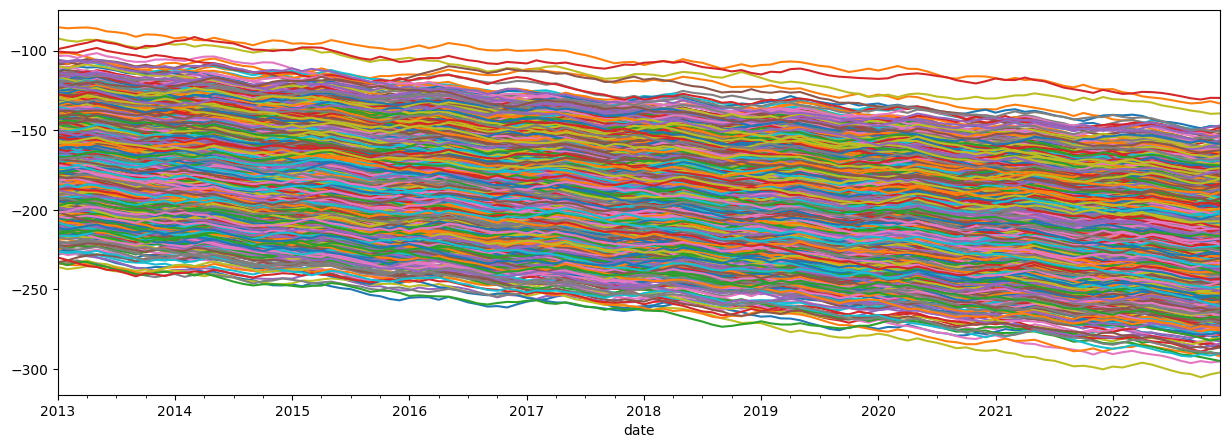

In [7]:
#First glance of the data
gdf_pivot_1.plot(figsize=(15,5), legend=False, xlim=[datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])
nb_sites_input = gdf_pivot_1.shape[1]
print("The number of observation points available is", nb_sites_input)

## 3. Data filtering
This step consists in removing observation wells from the analysis, for instance if they are incomplete. There are two options:
1. Removing time series if at least one value is missing
2. Removing time series if the percentage of missing values is larger than 70%

In [8]:
# DATA SELECTION
# This step consists in removing observation wells from the analysis, for instance if they are incomplete. 

# gdf_1 = gdf_pivot_1.copy().dropna(axis=1) saved formula to remove all time series if at least one value is missing

# Removing time series if the percentage of missing values is larger than some percentage
#perc_months_missing = 0.66
perc_months_missing =0.66
gdf_1 = gdf_pivot_1.copy()
    
max_number_of_monthly_nas = perc_months_missing*gdf_1.shape[0]
gdf_1 = gdf_1.loc[:, (gdf_1.isnull().sum(axis=0) <= max_number_of_monthly_nas)]

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

# Removing time series if data are missing for more than 1 year
gdf_1_year = gdf_1.resample('1y').mean()
gdf_1_year.index.name = "date"
print(gdf_1_year)

nb_years_missing = 1

col_to_drop = [i for i in gdf_1_year.columns if gdf_1_year[i].isnull().sum() > nb_years_missing]
print()
print(col_to_drop)
gdf_1.drop(col_to_drop, inplace = True, axis=1)

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

#gdf_1.plot(figsize=(15,5), legend=None, xlim=[datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

The number of observation points selected is 3200
site            Site_1     Site_10    Site_100   Site_1000   Site_1001  \
date                                                                     
2013-12-31 -165.643333 -181.690000 -172.220000 -115.573333 -201.800000   
2014-12-31 -173.779167 -184.765833 -174.620833 -120.190000 -208.456667   
2015-12-31 -179.830833 -187.075000 -177.594167 -128.470000 -210.195833   
2016-12-31 -186.325000 -192.782500 -184.040833 -133.545833 -211.635000   
2017-12-31 -192.732500 -198.295000 -190.012500 -142.385000 -219.005833   
2018-12-31 -199.411667 -204.181667 -194.396667 -150.429167 -223.997500   
2019-12-31 -208.966667 -208.036667 -199.802500 -157.835833 -228.380000   
2020-12-31 -210.525833 -210.698333 -206.771667 -160.033333 -232.274167   
2021-12-31 -216.252500 -218.349167 -209.775833 -164.997500 -240.158333   
2022-12-31 -220.878333 -230.313333 -217.021667 -164.735833 -250.557500   

site         Site_1002   Site_1003   Site_1004   Site_1005   

In [9]:
#Final dataset to work further in the evaluation
gdf_1

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-159.58,-178.07,-170.61,-116.42,-199.08,-167.69,-155.90,-190.82,-132.96,-155.45,...,-176.11,-160.16,-167.01,-154.14,-121.63,-178.90,-173.93,-168.30,-156.57,-173.64
2013-02-28,-160.72,-177.31,-170.49,-115.78,-198.51,-168.22,-155.31,-191.39,-132.03,-156.70,...,-175.27,-159.11,-166.85,-155.70,-122.62,-180.24,-172.90,-167.52,-157.87,-173.72
2013-03-31,-161.96,-179.24,-169.37,-113.95,-196.88,-169.27,-156.72,-192.08,-130.47,-157.09,...,-173.80,-159.80,-166.08,-155.37,-123.22,-179.61,-173.45,-167.23,-156.69,-172.05
2013-04-30,-162.89,-180.39,-168.46,-113.93,-197.13,-167.96,-158.15,-193.24,-129.64,-155.20,...,-174.24,-158.73,-164.36,-156.07,-124.13,-180.50,-172.04,-166.48,-155.46,-173.99
2013-05-31,-164.04,-180.16,-170.24,-112.38,-199.07,-168.36,-157.46,-195.04,-130.15,-157.11,...,-173.23,-156.77,-163.21,-155.92,-125.38,-181.19,-173.44,-165.95,-154.70,-175.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


## 4. Calculate aquifer-average trend
See https://www.w3schools.com/python/matplotlib_subplot.asp

In [10]:
# dataframe with site / date / level
gdf_melt = gdf_1.copy() #dataframe from step 3
gdf_melt = gdf_melt.unstack().reset_index(name='level')
gdf_melt.set_index('site', inplace=True)
gdf_melt

,date,level
site,,
Site_1,2013-01-31,-159.58
Site_1,2013-02-28,-160.72
Site_1,2013-03-31,-161.96
Site_1,2013-04-30,-162.89
Site_1,2013-05-31,-164.04
...,...,...
Site_999,2022-08-31,-246.54
Site_999,2022-09-30,-247.58
Site_999,2022-10-31,-248.24


In [13]:
#OBTAIN MEAN WATER LEVEL PER SITE TO THEN SUBTRACT FROM WATER LEVELS - ANOMALY 
waterlevel_means = gdf_melt.reset_index().groupby('site', as_index=False)['level'].mean()
waterlevel_means.set_index('site', inplace=True)
waterlevel_means

,level
site,
Site_1,-195.434583
Site_10,-201.618750
Site_100,-192.625667
Site_1000,-143.819583
Site_1001,-222.646083
...,...
Site_995,-202.908500
Site_996,-194.229750
Site_997,-193.951167


In [15]:
# ASSIGN MEAN WATER LEVEL TO EACH DATA ROW
gdf_melt['mean_level'] = gdf_melt.index.map(waterlevel_means['level'])
gdf_melt

,date,level,mean_level
site,,,
Site_1,2013-01-31,-159.58,-195.434583
Site_1,2013-02-28,-160.72,-195.434583
Site_1,2013-03-31,-161.96,-195.434583
Site_1,2013-04-30,-162.89,-195.434583
Site_1,2013-05-31,-164.04,-195.434583
...,...,...,...
Site_999,2022-08-31,-246.54,-208.055167
Site_999,2022-09-30,-247.58,-208.055167
Site_999,2022-10-31,-248.24,-208.055167


In [16]:
# Calculate normalized water level "norm_level"
gdf_melt['norm_level'] = gdf_melt['level'] - gdf_melt['mean_level']
gdf_melt 

,date,level,mean_level,norm_level
site,,,,
Site_1,2013-01-31,-159.58,-195.434583,35.854583
Site_1,2013-02-28,-160.72,-195.434583,34.714583
Site_1,2013-03-31,-161.96,-195.434583,33.474583
Site_1,2013-04-30,-162.89,-195.434583,32.544583
Site_1,2013-05-31,-164.04,-195.434583,31.394583
...,...,...,...,...
Site_999,2022-08-31,-246.54,-208.055167,-38.484833
Site_999,2022-09-30,-247.58,-208.055167,-39.524833
Site_999,2022-10-31,-248.24,-208.055167,-40.184833


          date  norm_level
0   2013-01-31   25.091894
1   2013-02-28   25.065576
2   2013-03-31   25.028304
3   2013-04-30   25.061179
4   2013-05-31   25.021423
..         ...         ...
115 2022-08-31  -24.171509
116 2022-09-30  -25.412606
117 2022-10-31  -25.411431
118 2022-11-30  -25.384187
119 2022-12-31  -25.421984

[120 rows x 2 columns]


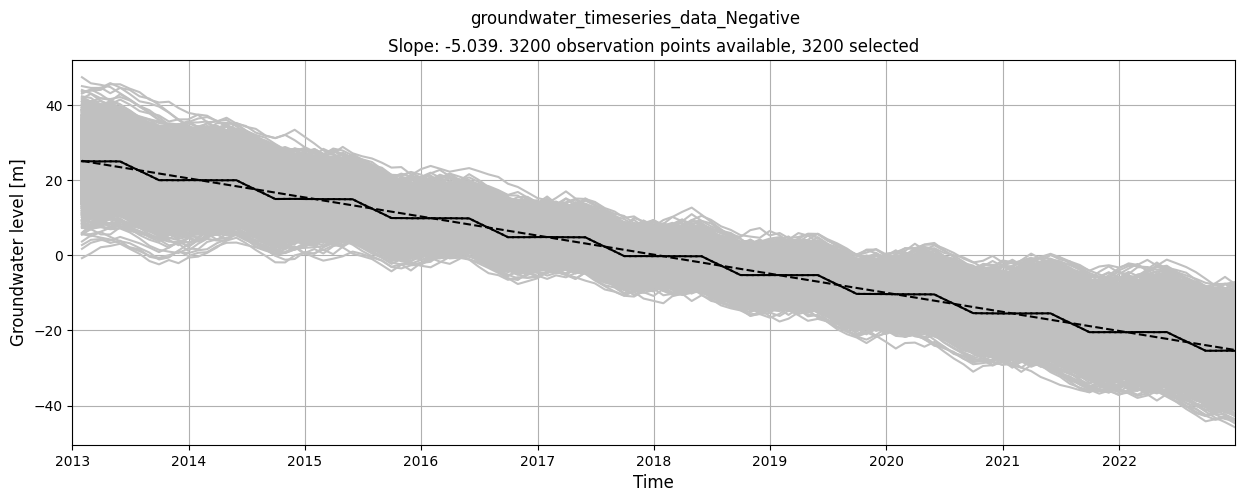

In [17]:
# aquifer-averaged data
final_df1 = gdf_melt[['date', 'norm_level']].groupby('date', as_index=False).mean()
print(final_df1)
final_df1.to_csv('debug.csv', index=False)

# linear trend
final_df1.loc[:, "date"] = pd.to_datetime(final_df1.loc[:, "date"], format="%d-%b-%y")
y_values = final_df1.loc[:, "norm_level"]
x_values = np.linspace(0, 1, len(final_df1.loc[:, "norm_level"]))
    
#cleaning NaN
idx = np.isfinite(x_values) & np.isfinite(y_values)
slope,b = np.polyfit(x_values[idx], y_values[idx], 1)
        
linear_fit = x_values*slope + b

fig, ax = plt.subplots(figsize=(15,5))

gdf_pivot = gdf_melt.pivot_table(index='date',columns='site',values='norm_level')    
plt.plot(gdf_pivot, color='#C0C0C0')     # all the monitoring curves

final_df2=final_df1.dropna()
plt.plot(final_df2.loc[:, "date"], final_df2.loc[:, "norm_level"],color='black', linestyle="dotted") # the composite hydrograph
plt.plot(final_df1.loc[:, "date"], final_df1.loc[:, "norm_level"],color='black') # the composite hydrograph

plt.plot(final_df1.loc[:, "date"], linear_fit, color='#000000', linestyle='dashed') # the linear regression

# axes
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Groundwater level [m]', fontsize = 12)
ax.grid()
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

# title
plt.title("Slope: {}. {} observation points available, {} selected".format(round(slope/10, 3), nb_sites_input, nb_sites)) 
   # the slope is calculated over 0 --> 1, it has to be 2013.01.01 --> 2022.12.31 (10 years)
plt.suptitle(filename[:-4])

# save chart as an image
fig.savefig(filename[:-4] + ".jpg", bbox_inches='tight')

plt.show()

# UPDATE THE LIST OF OUTPUTS
list_aquifers.append((filename[:-4], round(slope, 3), nb_sites_input, nb_sites))

In [18]:
#final_df1.reset_index(inplace=True)
year_df = final_df1
print(year_df)
year_df.set_index('date', inplace=True)
year_df = year_df.resample('Y').mean()
year_df.dropna()
year_df['percent_rank'] = year_df.loc[:,'norm_level'].rank(pct=True)
print(year_df)
percentile = year_df.iloc[-1]['percent_rank']
percentile_year = year_df.index[-1]
print("percentile: {}\nyear: {}".format(percentile, percentile_year))

          date  norm_level
0   2013-01-31   25.091894
1   2013-02-28   25.065576
2   2013-03-31   25.028304
3   2013-04-30   25.061179
4   2013-05-31   25.021423
..         ...         ...
115 2022-08-31  -24.171509
116 2022-09-30  -25.412606
117 2022-10-31  -25.411431
118 2022-11-30  -25.384187
119 2022-12-31  -25.421984

[120 rows x 2 columns]
            norm_level  percent_rank
date                                
2013-12-31   22.752125           1.0
2014-12-31   17.731873           0.9
2015-12-31   12.658351           0.8
2016-12-31    7.572102           0.7
2017-12-31    2.530622           0.6
2018-12-31   -2.524751           0.5
2019-12-31   -7.556617           0.4
2020-12-31  -12.693258           0.3
2021-12-31  -17.751607           0.2
2022-12-31  -22.718840           0.1
percentile: 0.1
year: 2022-12-31 00:00:00


## 6. Update summary file

We save the information about this aquifer in the summary file

In [19]:
# Create the pandas DataFrame
output_df = pd.DataFrame(list_aquifers, columns=['aquifer', 'slope', 'nb_sites_input', 'nb_sites'])
output_df.to_csv('Overview.csv', index=False)